<span style="color: cyan;">

#### ```Portfolio Assignment 2-1```

This notebook is designed to provide hands-on experience with Python functions for data analysis. It guides the user through loading, inspecting, and analyzing a survey dataset (`autoSurvey.csv`) related to automobiles. The notebook demonstrates various data manipulation and visualization techniques, including:

- Loading and displaying data with pandas
- Calculating covariance and correlation matrices
- Visualizing data relationships using dendrograms and heatmaps
- Performing clustering analysis (K-Means, Elbow method)
- Applying Principal Component Analysis (PCA) for dimensionality reduction
- Creating advanced plots (3D trisurface, biplot) to interpret results

The overall purpose is to explore, analyze, and visualize the dataset using Python’s data science libraries.

This code cell below imports a variety of Python libraries commonly used for data analysis, manipulation, and visualization. 

Libraries like `pandas` and `numpy` are foundational for handling and processing data efficiently. `seaborn` and `matplotlib.pyplot` are popular for creating static visualizations, while `plotly` modules (`figure_factory` and `graph_objects`) enable interactive plotting. 

The code also brings in specialized tools for clustering (`KMeans` from `sklearn.cluster`), dimensionality reduction (`PCA` from `sklearn.decomposition`), and distance calculations (`pdist`, `squareform` from `scipy.spatial.distance`).

Additional imports like `mpl_toolkits.mplot3d.Axes3D` and `bioinfokit.visuz.cluster` support advanced 3D plotting and cluster visualization.

The code also imports `math` for mathematical operations and `warnings` to manage warning messages.

To keep the output clean, the code disables `UserWarning` messages using `warnings.simplefilter`. 

It further configures NumPy to supress common numerical warnings such as underflow, divide-by-zero, invalid operations, and overflow. 

This is useful in data science workflows where such warnings can be frequent but not always critical, allowing the user to focus on results rather than warning messages.

In [ ]:
#
# Data manipulation and visualization libraries
#
import pandas                 as     pd                
import numpy                  as     np                
import seaborn                as     sns               
from   sklearn.cluster        import KMeans            
import matplotlib.pyplot      as     plt               
import plotly.figure_factory  as     ff                
import plotly.graph_objects   as     go                
from   scipy.spatial.distance import pdist, squareform 
from   matplotlib             import cm                
from   matplotlib             import colors as mcolors            
from   bioinfokit.visuz       import cluster           
from   sklearn.decomposition  import PCA               
import math                                            
import warnings                                        
#
# Supress UserWarnings
#
warnings.simplefilter(action="ignore",category=UserWarning)
#
# Set numpy error handling to supress specific warnings
#
np.seterr(under   = 'ignore')                          
np.seterr(divide  = 'ignore')                         
np.seterr(invalid = 'ignore')                          
np.seterr(over    = 'ignore')                          

<span style="color: cyan;">

The first line below uses pandas' [`read_csv`] function to load data from a CSV file named `autoSurvey.csv` located in the files directory. 

The resulting DataFrame, [`dataframe`], contains the tabular data from the CSV file, with columns and rows corresponding to the file's structure.

The second line simply outputs the DataFrame, displaying its contents in the notebook. 

This is a common practice in Jupyter notebooks to quickly inspect the loaded data, verify that the import was successful, and get an initial sense of the dataset's structure and values before proceeding with further analysis or processing.

The file contains survey data related to automobiles, and the DataFrame will allow you to manipulate and analyze this data using pandas' powerful data handling capabilities.

In [2]:
dataframe = pd.read_csv('files/autoSurvey.csv')
dataframe

driving_properties  interior  technology  comfort  reliability  handling  \
0                     0         0           1        0            1         0   
1                     1         0           0        0            0         1   
2                     1         0           0        1            0         0   
3                     0         1           0        1            1         0   
4                     0         1           1        1            0         0   
..                  ...       ...         ...      ...          ...       ...   
788                   1         0           1        0            1         0   
789                   0         0           0        0            0         0   
790                   1         0           0        0            0         0   
791                   1         1           0        1            1         1   
792                   1         0           0        0            0         1   

     power  consumption  sporty  safety  gender  household  
0        0            0       1       1       0          1  
1        0            0       0       1       0          1  
2        1            0       1       1       0          1  
3        0            0       1       1       0          0  
4        0            0       0       0       0          0  
..     ...          ...     ...     ...     ...        ...  
788      1            0       0       1       0          0  
789      0            0       0       0       0          1  
790      1            1       0       1       0          1  
791      1            0       1       0       0          1  
792      1            0       1       0       0          1  

[793 rows x 12 columns]

<span style="color: cyan;">

This code calculates the covariance matrix of the data in the DataFrame `dataframe` using NumPy's `np.cov` function. The covariance matrix is a square matrix that shows the covariance (a measure of how much two variables change together) between each pair of columns in the dataset. This is useful for understanding relationships and dependencies among variables, especially in statistical analysis and machine learning.

The line `print("Covariant Martix")` outputs a label to the console, indicating that the following output is the covariance matrix. The final line simply displays the matrix itself, allowing you to inspect the computed covariances. Note that this calculation assumes all columns are numeric; if there are non-numeric columns, you may need to select only the relevant columns before computing the covariance.

In [3]:
covMatrix = np.cov(dataframe)
print("Covariant Martix")
covMatrix

Covariant Martix


array([[ 0.26515152,  0.03030303,  0.04545455, ..., -0.00757576,
        -0.03030303, -0.00757576],
       [ 0.03030303,  0.24242424,  0.09090909, ...,  0.12121212,
         0.03030303,  0.12121212],
       [ 0.04545455,  0.09090909,  0.27272727, ...,  0.13636364,
         0.09090909,  0.13636364],
       ...,
       [-0.00757576,  0.12121212,  0.13636364, ...,  0.26515152,
        -0.03030303,  0.08333333],
       [-0.03030303,  0.03030303,  0.09090909, ..., -0.03030303,
         0.24242424,  0.15151515],
       [-0.00757576,  0.12121212,  0.13636364, ...,  0.08333333,
         0.15151515,  0.26515152]])

<span style="color: cyan;">

This code generates a dendrogram visualization of the data in the DataFrame `dataframe` using Plotly's figure factory. The first line, `np.random.seed(42), sets the random seed for NumPy to ensure reproducibility—any random operations performed will yield the same results each time the code runs.

The second line creates a dendrogram figure with `ff.create_dendrogram(dataframe, color_threshold = 1.5)`. A dendrogram is a tree-like diagram that shows the hierarchical relationships between observations, often used in clustering analysis. The `color_threshold = 1.5` argument determines how clusters are colored based on their linkage distance.

The third line, `fig.update_layout(width=800, height=500)`, sets the size of the figure for better visibility. Finally, `fig.show()` displays the dendrogram in the notebook, allowing you to visually inspect the clustering structure of your data. This visualization helps you understand how data points group together and can guide further analysis or feature selection.

In [4]:
np.random.seed(42)
fig = ff.create_dendrogram(dataframe, color_threshold = 1.5)
fig.update_layout(width=800, height=500)
fig.show()

<span style="color: cyan;">

This code creates a combined dendrogram and heatmap visualization using Plotly, which helps to explore hierarchical clustering and pairwise distances in your dataset. It starts by generating a dendrogram along the top (bottom orientation) of the figure, representing hierarchical relationships among data points. Each trace in this dendrogram is assigned to a secondary y-axis (`y2`) for layout control.

Next, a side dendrogram is created with a right orientation, and its traces are assigned to a secondary x-axis (`x2`). These traces are then added to the main figure, resulting in two dendrograms—one on the top and one on the right—framing the heatmap.

The code then extracts the order of leaves from the side dendrogram, which determines how rows and columns are arranged in the heatmap. It computes pairwise distances between data points using `pdist` and converts these distances into a square matrix with `squareform`. The matrix is reordered according to the dendrogram leaves, ensuring the heatmap aligns with the clustering structure.

A heatmap is created using Plotly’s `go.Heatmap`, with axes and colorscale set for visual clarity. The heatmap’s axes are synchronized with the dendrogram tick values for proper alignment. The heatmap trace is added to the figure.

Finally, the layout is customized: the figure size is set, legends are hidden, and axes domains are adjusted to position the dendrograms and heatmap correctly. The axes are further styled to remove grid lines, ticks, and labels for a cleaner look. The completed figure is displayed, providing an interactive visualization that combines hierarchical clustering (dendrograms) and pairwise relationships (heatmap) for deeper data insight.

In [5]:
# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(dataframe, orientation='bottom')
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'
# Create Side Dendrogram
dendro_side = ff.create_dendrogram(dataframe, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'
# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)
# Create Heatmap
dendro_leaves   = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves   = list(map(int, dendro_leaves))
data_dist       = pdist(dataframe)
heat_data       = squareform(data_dist)
heat_data       = heat_data[dendro_leaves,:]
heat_data       = heat_data[:,dendro_leaves]
heatmap         = [ go.Heatmap(x = dendro_leaves, y = dendro_leaves, z = heat_data, colorscale = 'Blues')]
heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']
# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)
# Edit Layout
fig.update_layout({'width':800, 'height':800,'showlegend':False, 'hovermode': 'closest'})
# xaxis is the dendrogram on the top
# xaxis2 is the dendrogram on the right side
# yaxis is the heatmap on the left side
# yaxis2 is the heatmap on the bottom
# Edit xaxis
fig.update_layout(xaxis = {'domain'        : [.15, 1],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'ticks'         : ""})
# Edit xaxis2
fig.update_layout(xaxis2= {'domain'        : [0, .15],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'showticklabels': False,
                           'ticks'         : ""})
# Edit yaxis
fig.update_layout(yaxis = {'domain'        : [0, .85],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'showticklabels': False,
                           'ticks'         : ""})
# Edit yaxis2
fig.update_layout(yaxis2= {'domain'        :[.825, .975],
                           'mirror'        : False,
                           'showgrid'      : False,
                           'showline'      : False,
                           'zeroline'      : False,
                           'showticklabels': False,
                           'ticks'         : ""})
# Plot!
#fig.update_layout(width=1600, height=1000)
fig.show()

<span style="color: cyan;">

This code generates a correlation heatmap using Seaborn and Matplotlib to visualize the relationships between variables in the DataFrame. The `sns.heatmap` function computes the correlation matrix with `dataframe.corr()` and displays it as a color-coded grid, where each cell represents the correlation coefficient between two variables. The `annot=True` parameter adds the actual correlation values to each cell, and `annot_kws={"fontsize":6}` sets the font size for these annotations.

The following lines customize the plot for readability and presentation. The title is set to 'Correlation Heatmap', and the x-axis labels are rotated 90 degrees while the y-axis labels remain horizontal for better visibility. `plt.tight_layout()` ensures that all elements fit well within the figure boundaries. The axis labels are set with a smaller font size, and the tick labels are also resized for clarity.

The code then attempts to set the figure size to an extremely large value (`figsize=(7000, 7000)`) with a high DPI, which is unusual and may not be practical for most displays or outputs. Finally, `plt.show()` renders the heatmap, allowing you to visually inspect the strength and direction of relationships between variables in your dataset. This visualization is useful for quickly identifying highly correlated features, which can inform further analysis or feature selection.

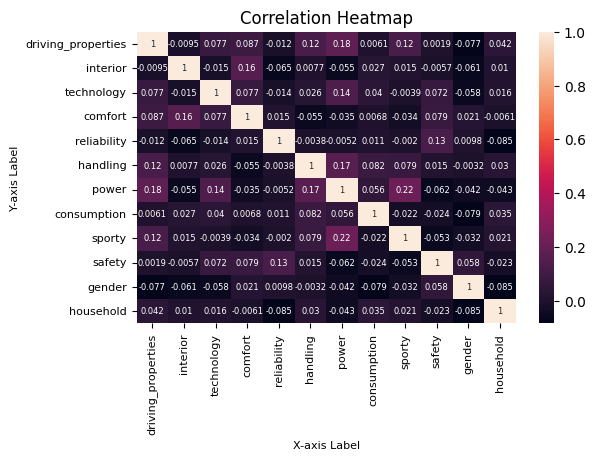

In [6]:
# generating correlation heatmap
sns.heatmap(dataframe.corr(), annot = True,annot_kws={"fontsize":6})
# posting correlation heatmap to output console
plt.title('Correlation Heatmap')
plt.xticks(rotation = 90)
plt.yticks(rotation =  0)
plt.tight_layout()
plt.xlabel('X-axis Label', fontsize=8)
plt.ylabel('Y-axis Label', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.figure(figsize  = (70, 70), dpi=300)
plt.show()

<span style="color: cyan;">

This code creates a 3D trisurface plot to visualize the pairwise correlations between variables in a dataset. It starts by setting the number of clusters to 2 and generates a list of color names sorted by their HSV values, which could be used for coloring clusters (though the colors are not directly used in the plot here).

The main focus is on transforming the correlation matrix of the DataFrame. The code computes the correlation matrix, replaces its row and column labels with integer indices, and converts the matrix to an object type so each cell can store a tuple. For every pair of variables, it creates a tuple containing the row index, column index, and the correlation value. Diagonal elements (where a variable is compared to itself) are set to zero.

All these tuples are flattened into a single list and converted into a DataFrame suitable for 3D plotting. The plot is created using Matplotlib's 3D plotting tools, with `plot_trisurf` rendering a surface where the x and y axes represent variable indices and the z axis shows the correlation values. The color map (`cm.jet`) visually encodes the correlation strength, and the surface is drawn with thin lines for clarity.

This visualization helps you spot patterns, clusters, or outliers in the correlation structure of the dataset. Note that the axes use indices rather than variable names, so interpreting the plot may require referencing the original column order.

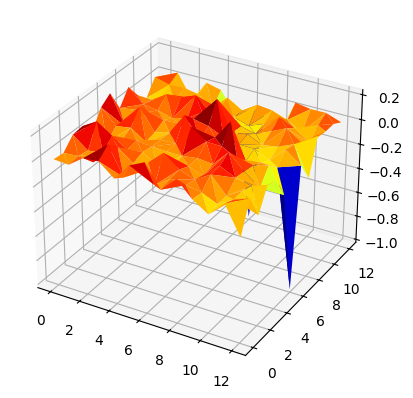

In [15]:
clusters = 2
# Generating different colors in ascending order of their hsv values
colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
# number of steps to taken generate n(clusters) colors
skips               = math.floor(len(colors[5 : -5])/clusters)
cluster_colors      = colors[5 : -5 : skips]
# generating correlation data
data                = dataframe.corr()
data.index          = range(0, len(data))
data.rename(columns = dict(zip(data.columns, data.index)), inplace = True)
data                = data.astype(object)
# Generating coordinates with corresponding correlation values
for i in range(0, len(data)):
    for j in range(0, len(data)):
        if i != j:
            data.iloc[i, j] = (i, j, data.iloc[i, j])
        else :
            data.iloc[i, j] = (i, j, 0)
df_list = []
# flattening dataframe values
for sub_list in data.values:
    df_list.extend(sub_list)
# converting list of tuples into trivariate dataframe
plot_df = pd.DataFrame(df_list)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2], cmap=cm.jet, linewidth=0.2)
plt.show()

<span style="color: cyan;">

This code applies the Elbow method to determine the optimal number of clusters for K-Means clustering on selected features from the dataset. It first extracts relevant columns—such as driving properties, interior, technology, comfort, reliability, handling, power, consumption, sporty, safety, gender, and household—into a NumPy array called `x_input`.

The code then initializes an empty list, `wcss`, to store the Within-Cluster Sum of Squares (WCSS) values, which measure how tightly grouped the data points are within each cluster. For each value of `k` from 1 to 11, it fits a KMeans model and appends the resulting WCSS (inertia) to the list.

After collecting WCSS values for each cluster count, the code plots them against the number of clusters. The resulting "Elbow method" graph helps identify the optimal number of clusters by looking for a point where the decrease in WCSS slows down sharply—this is known as the "elbow." The plot is customized with a title and axis labels, and `plt.show()` displays the graph. This visualization guides you in choosing a suitable number of clusters for further analysis.

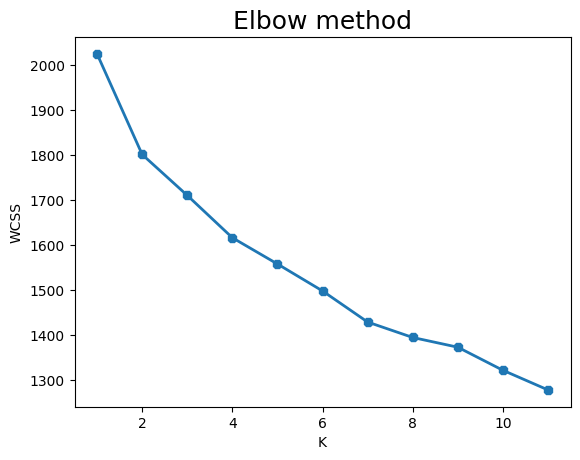

In [8]:
# K-Means clustering to find optimal number of clusters using the Elbow method
# Extracting relevant features for clustering
# Note: The features used for clustering are 'driving_properties', 'interior', 'technology', 
# 'comfort', 'reliability', 'handling', 'power', 'consumption', 'sporty', 'safety', 'gender', 'household'
x_input = dataframe.loc[:, ['driving_properties', 'interior'   , 'technology',
                            'comfort'           , 'reliability', 'handling',
                            'power'             , 'consumption', 'sporty',
                            'safety'            , 'gender'     , 'household']].values
# Initialize the list to store WCSS values
wcss = []
# Fit KMeans for different values of k and compute WCSS
for k in range(1, 12):
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=0)
    k_means.fit(x_input)
    wcss.append(k_means.inertia_)
# Plotting the Elbow method graph     
#plt.figure(figsize=(15,8))
plt.plot(range(1, 12), wcss, linewidth=2, marker='8')
plt.title('Elbow method', fontsize=18)
plt.xlabel('K')
plt.ylabel('WCSS')
ax     = plt.gca()
line   = ax.get_lines()[0]
xydata = line.get_xydata()
plt.show()

<span style="color: cyan;">

This code performs K-Means clustering on selected features from the dataset, using the optimal number of clusters determined previously (in this case, 2). It first specifies the features to use for clustering, which include various aspects of automobile survey responses such as driving properties, interior, technology, comfort, reliability, handling, power, consumption, sporty, safety, gender, and household.

A KMeans object is created with `n_clusters=2` and a fixed random seed for reproducibility. The `fit_predict` method is called on the selected columns, which fits the K-Means model and assigns each row in the DataFrame to one of the two clusters. The resulting cluster labels are stored in a new column called 'Cluster' in the DataFrame.

Finally, `dataframe.head()` displays the first few rows of the updated DataFrame, allowing you to see which cluster each data point has been assigned to. This step is useful for segmenting the data and analyzing patterns or differences between the identified clusters.

In [9]:
# K-Means clustering with the optimal number of clusters
# Extracting relevant features for clustering
# Note: The features used for clustering are 'driving_properties', 'interior', 'technology', 
# 'comfort', 'reliability', 'handling', 'power', 'consumption', 'sporty', 'safety', 'gender', 'household'
n_clusters = 2
kmeans     = KMeans(n_clusters, random_state=0)
y          = kmeans.fit_predict(dataframe[['driving_properties', 'interior'   , 'technology', 
                                           'comfort'           , 'reliability','handling',
                                           'power'             , 'consumption', 'sporty', 
                                           'safety'            , 'gender'     , 'household']])
dataframe['Cluster'] = y
dataframe.head()

driving_properties  interior  technology  comfort  reliability  handling  \
0                   0         0           1        0            1         0   
1                   1         0           0        0            0         1   
2                   1         0           0        1            0         0   
3                   0         1           0        1            1         0   
4                   0         1           1        1            0         0   

   power  consumption  sporty  safety  gender  household  Cluster  
0      0            0       1       1       0          1        1  
1      0            0       0       1       0          1        1  
2      1            0       1       1       0          1        0  
3      0            0       1       1       0          0        1  
4      0            0       0       0       0          0        1

<span style="color: cyan;">

This code applies Principal Component Analysis (PCA) to the dataset to reduce its dimensionality to two principal components. PCA is a technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible. Here, the number of components is set to 2, so the data is projected onto two new axes, `pca1` and `pca2`.

The transformed data is stored in a new DataFrame called `results`, with columns representing the two principal components. A scatter plot is then created using Seaborn, where each point represents a data sample in the reduced PCA space. The points are colored according to their cluster assignment from the K-Means algorithm, allowing you to visually assess how well the clusters are separated in the lower-dimensional space.

The plot is titled 'K-means Clustering with 2 dimensions', and `plt.show()` displays the visualization. This approach helps to interpret clustering results and understand the structure of the data after dimensionality reduction.

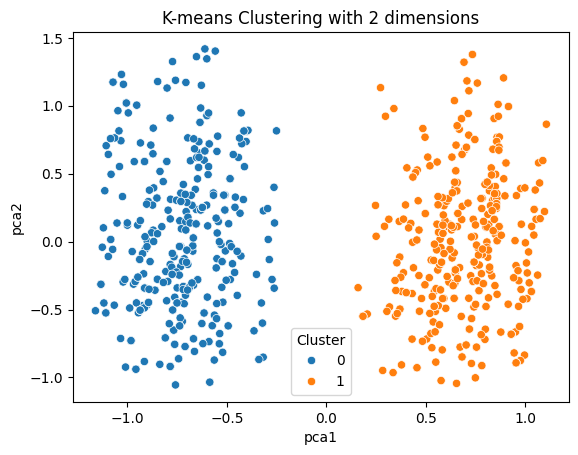

In [10]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
# Extracting relevant features for clustering
n_clusters         = 2
pca_num_components = 2
reduced_data       = PCA(n_components=pca_num_components).fit_transform(dataframe)
results            = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=dataframe['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<span style="color: cyan;">

This code performs Principal Component Analysis (PCA) on the dataset to reduce its dimensionality. First, it creates a new DataFrame `df` by selecting all columns except the last one from `dataframe`, which is likely to exclude a non-numeric or cluster label column. The PCA model is then fitted to this data with the number of components specified by `pca_num_components` (typically set to 2 for visualization).

After fitting, the code extracts the principal component loadings using `pca_out.components_`. These loadings indicate how much each original feature contributes to each principal component, helping to interpret the meaning of the new axes. Finally, `pca_out.explained_variance_ratio_` returns the proportion of variance captured by each principal component, showing how much information from the original data is retained in the reduced dimensions. This is useful for assessing the effectiveness of dimensionality reduction.

In [11]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
df       = dataframe.iloc[: , :-1]
pca_out  = PCA(n_components=pca_num_components).fit(df)
loadings = pca_out.components_
pca_out.explained_variance_ratio_

array([0.13793337, 0.1149353 ])

<span style="color: cyan;">

This code generates a biplot to visualize the results of Principal Component Analysis (PCA) on your dataset. A biplot is a graphical tool that displays both the scores (the transformed data points in the reduced PCA space) and the loadings (the contribution of each original feature to the principal components).

The function `cluster.biplot` is called with several arguments: `cscore` provides the coordinates of each data point in the PCA-reduced space, `loadings` supplies the weights showing how much each feature influences the principal components, and `labels` names the original features for clarity. The parameters `var1` and `var2` indicate the percentage of variance explained by the first and second principal components, respectively, making it easier to interpret the axes.

By visualizing both the data points and feature contributions, the biplot helps you understand how variables relate to each other and to the observations, and which features are most influential in separating the data in the reduced space. This is especially useful for interpreting clustering and dimensionality reduction results.

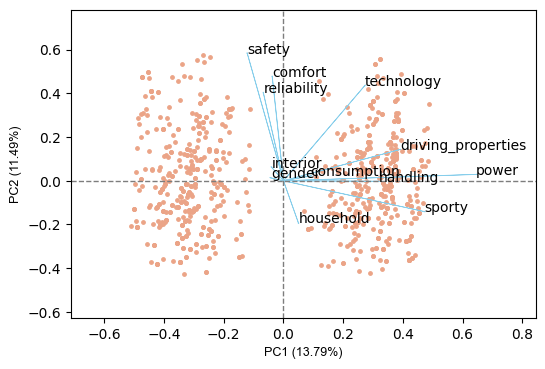

In [12]:
# Create a biplot to visualize the PCA results
# Note: A biplot is a graphical representation of the PCA results, showing both the scores and the loadings.
# The scores represent the data points in the reduced PCA space, while the loadings represent the contribution 
# of each original feature to the PCA components.
# The biplot helps to visualize the relationships between the observations and the variables.
cluster.biplot(show = True, cscore   = reduced_data, 
                            loadings = loadings, 
                            labels   = df.columns.values,
                            var1     = round(pca_out.explained_variance_ratio_[0]*100, 2), 
                            var2     = round(pca_out.explained_variance_ratio_[1]*100, 2))